# CS105 Final Project
By: Dexter (Yiu Ming) Wong, Irene Kim, Raymond Ng, Aaron Bantay, Jenhua Chang


# Project Proposal
To begin, we are interested in exploring a dataset from Spotify that contains a little over 32,000 songs. This dataset contains metadata about each song such as their key, loudness, tempo, etc. Our main objective is to see if we can determine the genre of each song based on the various features that each song's metadata provides. We plan on using the K-Nearest Neighbors algorithm to classify/predict each song's genre.  

# Data Collection & Cleaning

## Definition Key

**danceability** (double): Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy** (double): Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**key** (double): The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**loudness** (double): The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

**mode** (double): Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness** (double): Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**acousticness** (double): A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**instrumentalness** (double): Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**liveness** (double): 	Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**valence** (double): A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**tempo** (double): The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**duration_ms** (double): Duration of song in milliseconds

# EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


df = pd.read_csv("spotify_songs.csv")
df = df.iloc[:,[1,9,11,12,13,14,15,16,17,18,19,20,21,22]]
df.head()



,track_name,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Statistical Analysis
Let's start by first analyzing all of our songs at once. 

We will first begin by calculating the distribution of our data.


In [2]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


To garner a better understanding of each music genre, we look at each one individually and observe how the different auditory features reveal themselves. We have 6 main genres that we will be focusing on: pop, rap, rock, latin, r&b, and edm. Lets grab the means of all the features based on their genre so that we can compare all six genres and their averages for each feature. 


To give a better understanding of what the features name mean and how they were calculated please use the definition key above to understand what the values mean and how the feature numbers were calculated

In [3]:
data = df
pop =[0,0,0,0,0,0,0,0,0,0,0,0,0]
rap =[0,0,0,0,0,0,0,0,0,0,0,0,0]
edm = [0,0,0,0,0,0,0,0,0,0,0,0,0]
rb=[0,0,0,0,0,0,0,0,0,0,0,0,0]
latin=[0,0,0,0,0,0,0,0,0,0,0,0,0]
rock=[0,0,0,0,0,0,0,0,0,0,0,0,0]
#index 2 is gonna be the first element in the list, it will be danceibility
def giverow(pop, row):
    pop[0]= pop[0]+row[2]
    pop[1]= pop[1]+row[3]
    pop[2]= pop[2]+row[4]
    pop[3]= pop[3]+row[5]
    pop[4]= pop[4]+row[6]
    pop[5]= pop[5]+row[7]
    pop[6]= pop[6]+row[8]
    pop[7]= pop[7]+row[9]
    pop[8]= pop[8]+row[10]
    pop[9]= pop[9]+row[11]
    pop[10]= pop[10]+row[12]
    pop[11]= pop[11]+row[13]
    pop[12]= pop[12]+1
def print_mean(arr):
    print("Danceability Mean: " + str(round(arr[0]/arr[-1],3)))
    print("Energy Mean: " + str(round(arr[1]/arr[-1],3)))
    print("Key Mean: " + str(round(arr[2]/arr[-1],3)))
    print("Loudness Mean: " + str(round(arr[3]/arr[-1],3)))
    print("Mode Mean: " + str(round(arr[4]/arr[-1],3)))
    print("Speechiness Mean: " + str(round(arr[5]/arr[-1],3)))
    print("Acousticness Mean: " + str(round(arr[6]/arr[-1],3)))
    print("Instrumentalness Mean: " + str(round(arr[7]/arr[-1],3)))
    print("Liveness Mean: " + str(round(arr[8]/arr[-1],3)))
    print("Valence Mean: " + str(round(arr[9]/arr[-1],3)))
    print("Tempo Mean: " + str(round(arr[10]/arr[-1],3)))
    print("Duration_ms Mean: " + str(round(arr[11]/arr[-1],3)))
    print("Count of Songs: " + str(arr[-1]))
    
for index, row in df.iterrows():
    if (data.loc[index,"playlist_genre"] == "pop"):
        giverow(pop, row)
    if (data.loc[index,"playlist_genre"] == "rap"):
        giverow(rap,row)
    if (data.loc[index,"playlist_genre"] == "edm"):
        giverow(edm,row)
    if (data.loc[index,"playlist_genre"] == "r&b"):
        giverow(rb,row)
    if (data.loc[index,"playlist_genre"] == "latin"):
        giverow(latin,row)
    if (data.loc[index,"playlist_genre"] == "rock"):
        giverow(rock,row)

In [4]:
#pop print
print("                   Pop")
print("======================================")
print_mean(pop)

                   Pop
Danceability Mean: 0.639
Energy Mean: 0.701
Key Mean: 5.319
Loudness Mean: -6.315
Mode Mean: 0.588
Speechiness Mean: 0.074
Acousticness Mean: 0.171
Instrumentalness Mean: 0.06
Liveness Mean: 0.177
Valence Mean: 0.504
Tempo Mean: 120.743
Duration_ms Mean: 217768.104
Count of Songs: 5507


In [5]:
print("                   Edm")
print("======================================")
print_mean(edm)

                   Edm
Danceability Mean: 0.655
Energy Mean: 0.802
Key Mean: 5.352
Loudness Mean: -5.427
Mode Mean: 0.52
Speechiness Mean: 0.087
Acousticness Mean: 0.082
Instrumentalness Mean: 0.219
Liveness Mean: 0.212
Valence Mean: 0.401
Tempo Mean: 125.768
Duration_ms Mean: 222540.858
Count of Songs: 6043


In [6]:
print("                   r&b")
print("======================================")
print_mean(rb)

                   r&b
Danceability Mean: 0.67
Energy Mean: 0.591
Key Mean: 5.4
Loudness Mean: -7.865
Mode Mean: 0.521
Speechiness Mean: 0.117
Acousticness Mean: 0.26
Instrumentalness Mean: 0.029
Liveness Mean: 0.175
Valence Mean: 0.531
Tempo Mean: 114.222
Duration_ms Mean: 237599.49
Count of Songs: 5431


In [7]:
print("                   latin")
print("======================================")
print_mean(latin)

                   latin
Danceability Mean: 0.713
Energy Mean: 0.708
Key Mean: 5.484
Loudness Mean: -6.264
Mode Mean: 0.562
Speechiness Mean: 0.103
Acousticness Mean: 0.211
Instrumentalness Mean: 0.044
Liveness Mean: 0.181
Valence Mean: 0.606
Tempo Mean: 118.622
Duration_ms Mean: 216863.447
Count of Songs: 5155


In [8]:
print("                   rock")
print("======================================")
print_mean(rock)

                   rock
Danceability Mean: 0.521
Energy Mean: 0.733
Key Mean: 5.209
Loudness Mean: -7.589
Mode Mean: 0.7
Speechiness Mean: 0.058
Acousticness Mean: 0.145
Instrumentalness Mean: 0.062
Liveness Mean: 0.203
Valence Mean: 0.537
Tempo Mean: 124.989
Duration_ms Mean: 248576.5
Count of Songs: 4951


In [9]:
print("                   rap")
print("======================================")
print_mean(rap)

                   rap
Danceability Mean: 0.718
Energy Mean: 0.651
Key Mean: 5.471
Loudness Mean: -7.042
Mode Mean: 0.521
Speechiness Mean: 0.198
Acousticness Mean: 0.192
Instrumentalness Mean: 0.076
Liveness Mean: 0.192
Valence Mean: 0.505
Tempo Mean: 120.655
Duration_ms Mean: 214163.889
Count of Songs: 5746


Analysis about all the means shown above ^

After looking at the means above, we see that the (V) analysis for why we are choosing this


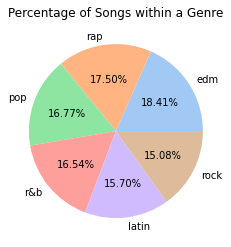

In [10]:
colors = sns.color_palette('pastel')
genres = df['playlist_genre'].value_counts().rename_axis('Genres').reset_index(name='Counts')

myLabels = genres.Genres
myVals = genres.Counts

plt.pie(myVals, labels=myLabels, colors = colors,  autopct='%.2f%%')
plt.title('Percentage of Songs within a Genre')
plt.show()

From the pie chart shown above, we can see that out of all the genres avaiable to us within the dataset, the 'EDM' genre is the most prominent with 18.41% of all songs belonging to it , while the 'ROCK' genre is the least prominent with 15.08% of all songs belonging to it. However, since the difference from the most prominent song to the least prominent genre is less than 3%, we can say  that the percentage of songs across all generes are pretty even. In the long run, this gives us more confidence knowing that there is not a genre that has an extreme value or outlier over the other genres.

In [11]:
bubble_df = pd.DataFrame([[0.639, 0.701,5507], [0.655, 0.802,6043], [0.67, 0.591,5431], [0.713, 0.708,5155], [0.521, 0.733,4951], [0.718, 0.651,5746]], columns=["danceability", "energy","count"])
bubble_df["playlist_genre"] = ["pop", "edm", "r&b", "latin", "rock", "rap"]

fig = px.scatter(bubble_df, x='danceability', y='energy',
             color="playlist_genre",size='count')
fig.update_layout(title="Comparison of Means between Energy and Danceability between Playlist Genres")
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(size=50))
fig.show()

Analysis about the bubble/scatter plot above ^ (explain how this might be able to help us predict using KD trees like if danceability is under.55 high chance it is rock etc.)

In [21]:
# Group the data by playlist_genre and compute the mean speechiness value for each group
speechiness_mean = df.groupby('playlist_genre')['speechiness'].mean()
speechiness_mean = speechiness_mean.reset_index()  # Reset the index so that the genre column can be accessed

# Create a bar plot using the speechiness_mean data
fig = px.bar(speechiness_mean, x="playlist_genre", y="speechiness",
              color="playlist_genre")

# Update the plot title and axis labels
fig.update_layout(title="Speechiness Feature by Genre")
fig.update_layout(xaxis_title="Genre")
fig.update_layout(title_x=0.5)
fig.update_layout(yaxis_title="Speechiness Feature")

# Show the plot
fig.show()


Analysis about the bar chart above ^ (explain how this might be able to help us predict using KD trees like if speechiness of a song is > 0.11 high chance it is rap etc.)


In [13]:
# Sample 100 random points from each playlist genre
sampled_df = df.groupby('playlist_genre').apply(lambda x: x.sample(500))

# Create a scatter plot using the sampled data
fig = px.scatter(sampled_df, x="loudness", y="energy", color="playlist_genre")

# Update the plot title and axis labels
fig.update_layout(title="Loudness and Energy by Genre")
fig.update_layout(xaxis_title="Loudness")
fig.update_layout(yaxis_title="Energy")

# Show the plot
fig.show()

In [14]:
# Create a DataFrame with the valence and playlist_genre columns from the df DataFrame
violin_df = pd.DataFrame({"valence": df["valence"], "playlist_genre": df["playlist_genre"]})

# Create a violin plot using the violin_df DataFrame
fig = px.violin(violin_df, x="playlist_genre", y="valence",color="playlist_genre")

# Update the plot title and axis labels
fig.update_layout(title="Valence by Genre")
fig.update_layout(xaxis_title="Genre")
fig.update_layout(yaxis_title="Valence")

# Show the plot
fig.show()

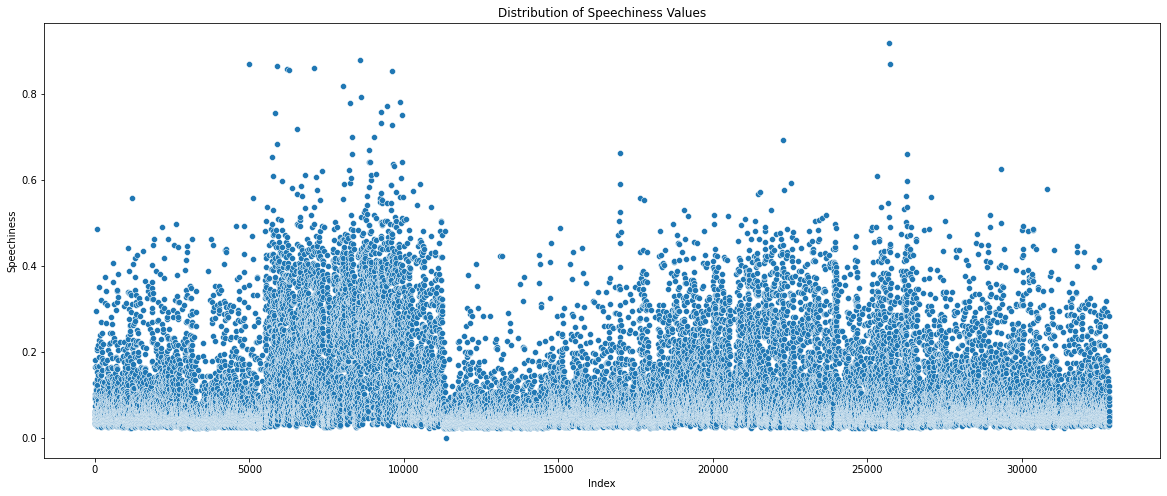

In [15]:
# Create the scatterplot
plt.figure(figsize=(20, 8))
sns.scatterplot(x=df.index, y='speechiness', data=df)

# Add a title and labels for the x and y axes
plt.title('Distribution of Speechiness Values')
plt.xlabel('Index')
plt.ylabel('Speechiness')
# Show the plot
plt.show()

Interestingly enough there is a sharp drop off in speechiness shortly after the 10,000th song. Otherwise, it seems that most songs will have a speechiness of around 0.4 or lower. 

Maybe we will see something if compare the speechiness and the tempo metrics.

<Figure size 1080x576 with 0 Axes>

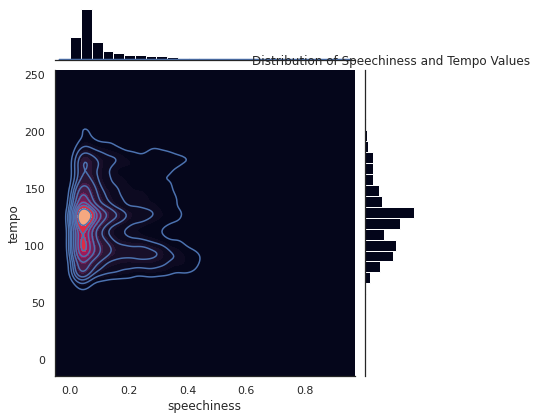

In [16]:
# Create the Smooth Kernel Density plot with marginal histograms
plt.figure(figsize=(15, 8))

sns.set_theme(style="white")
g = sns.jointplot(x='speechiness', y='tempo', data=df, kind='kde')
g.fig.set_facecolor('white')

# Add a title
plt.title('Distribution of Speechiness and Tempo Values')
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

# Show the plot
plt.show()

In this heatmap, we can see the distribution of tempo and speechiness together. We can see that there appears to be a cluster where both tempo and speechiness will be at a very high concentration. This suggests that most songs will be along the range of 125 tempo and have a speechiness of about 0.05. If two variables have a distribution that clusters together in a heatmap, it means that there is likely a strong relationship or association between the two variables. This can indicate that one variable is likely to predict the other, or that the two variables are somehow linked or dependent on one another. It is also possible that the clustering is due to a third, unseen variable that is influencing both of the variables in the heatmap.

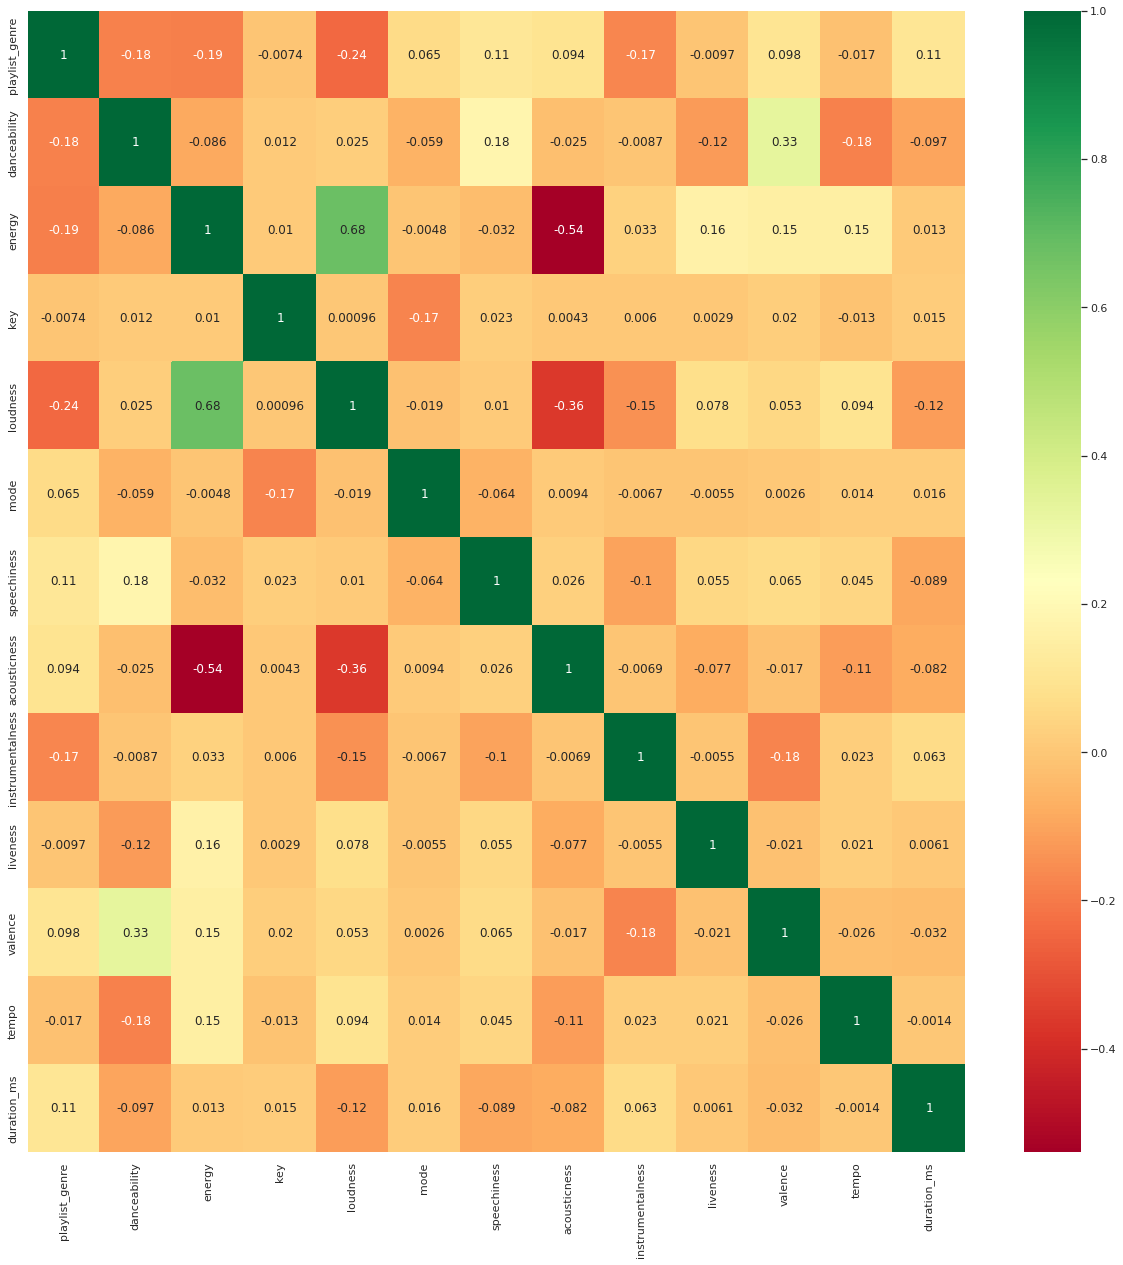

In [17]:
#correlation analysis on each feature

mapping = {'edm':1, 'latin':2,'pop':3,'r&b':4,'rap':5,'rock':6}

df["playlist_genre"] = df["playlist_genre"].map(mapping)

corr = df.corr();
top_feat = corr.index
plt.figure(figsize=(21,21))
g=sns.heatmap(df[top_feat].corr(),annot=True,cmap="RdYlGn")


After running correlation analysis and comparing each question to each other, we can see that there are no strong correlation in any of our questions. The highest correlation between two questions is loudness and energy with an r value of (0.68). Coming in second we can see a moderate negative correlation between energy and acousticness. 

[0.12326806 0.10698193 0.06806282 0.0926371  0.01557775 0.11984318
 0.09460656 0.09158818 0.0735494  0.09581185 0.11807317]


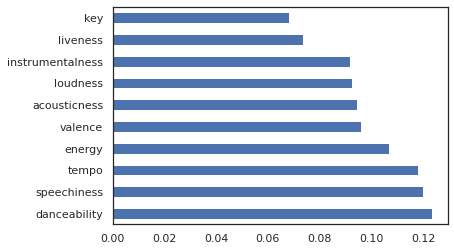

In [18]:
#Feature selection to pick the highest possible features for best accuracy
from sklearn.ensemble import ExtraTreesClassifier
X = df.iloc[:,2:13]
Y = df.iloc[:,1]

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()




In [19]:

# If the dataset does not have a "playlist_genre" column, create one
if "playlist_genre" not in df.columns:
    df["playlist_genre"] = "unknown"

# Select the speechiness and tempo columns as our features
X = df.drop(["playlist_genre","track_name"],axis=1)

# Define the target variable (the column we want to predict)
y = df["playlist_genre"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=1)
params = {"n_neighbors": [1, 3, 5, 7, 9, 11,13,15,17,19,21,23,25,27,29,31]}
grid_search = GridSearchCV(knn, params, cv=5, scoring="accuracy")
grid_search.fit(X,y)
# Fit the model to the training data
knn.fit(X_train, y_train)
print(grid_search.best_params_)

# Evaluate the model on the test data
accuracy = knn.score(X_test, y_test)*100
print(f"Accuracy: {accuracy:.2f}%")

{'n_neighbors': 1}
Accuracy: 29.95%


The cell above is creating a K-nearest neighbors (KNN) model for classification based on our dataset of spotify songs. The model uses the speechiness and tempo columns of the df dataframe as features to predict the playlist_genre column. The code first checks if the playlist_genre column exists in the dataframe, and creates it with all values set to "unknown" if it does not. Then, it splits the data into training and test sets and trains the KNN model on the training data. Here, we use the "train_test_split" function that splits a dataset into two subsets: a training set and a test set. The train_test_split function takes in the features data X and the target data y, along with some optional parameters. In this case, the test_size parameter is set to 0.2, which means that 20% of the data will be used for testing, and the remaining 80% will be used for training. The random_state parameter is set to 42, which sets the random seed for the split. This means that the split will always be the same whenever the code is run with the same random_state value. The function then returns the training and test sets for the features and the target, which are assigned to X_train, X_test, y_train, and y_test, respectively.
 
Finally, we create a model with n_neighbors set to 1. The KNN algorithm works by taking a sample to be classified, and finding the n_neighbors closest training samples. The sample is then assigned the class of the majority of the n_neighbors samples. In this case, since n_neighbors is set to 1, the sample will be assigned the class of the single closest training sample.
The code then creates a GridSearchCV object, which is used to search for the optimal value of n_neighbors using cross-validation. The GridSearchCV object is initialized with the KNN model, a dictionary of parameters to search over (in this case, just the values for n_neighbors), and the number of folds to use for cross-validation (in this case, 5). The fit method is then called on the GridSearchCV object to fit the model to the data and search for the optimal n_neighbors value.
After finding the optimal n_neighbors value, the KNN model is then fit to the training data using the fit method. The model is then evaluated on the test data and the accuracy is printed out. The accuracy is the percentage of test samples that were correctly classified by the model.
 
Based on this, we are able to see that the accuracy the KNN model gives us is 29.94%.

In [20]:
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("spotify_songs.csv")
df = df.iloc[:,[1,9,11,12,13,14,15,16,17,18,19,20,21,22]]

mapping = {'edm':1, 'latin':2,'pop':3,'r&b':4,'rap':5,'rock':6}

df["playlist_genre"] = df["playlist_genre"].map(mapping)

X= df.drop(["track_name","playlist_genre"],axis=1)
y = df["playlist_genre"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

model = DecisionTreeClassifier()

model.fit(X_train,y_train)

predictions = model.predict(X_test)

accuracy = model.score(X_test,y_test)*100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 44.00%


The cell above begins by preparing the data for use in a decision tree classifier. It loads the data, and then selects a subset of the columns to use as features. The iloc method is used to select the columns of interest by their indices.
Next, we create a mapping dictionary that maps the string values of the playlist_genre column to numeric values. This is necessary because decision tree classifiers can only handle numeric data. The map method is then used to apply the mapping to the playlist_genre column, replacing the string values with their corresponding numeric values.
We then create an x and y dataframe, which contain the features and target, respectively. The X dataframe is created by dropping the track_name and playlist_genre columns from the original dataframe, while the y dataframe is created by selecting only the playlist_genre column. These dataframes will be used to train and evaluate the decision tree classifier.
 
Now, we want to start splitting our data into testing and training sets. We first split the features and target data into training and test sets using train_test_split (like with KNN), with 25% of the data being used for testing. Then, it creates a DecisionTreeClassifier model and trains it on the training data using the fit method.
 
After the model is trained, it is used to make predictions on the test data using the predict method. The accuracy of the model is then computed using the score method, which compares the predicted values to the true values in the test set. The resulting accuracy is then printed out.
 
Based on this, we are able to see the accuracy the KD Tree model gives us is 43.72%, which is more accurate than the KNN model.

NOTE: THIS CODE IS JUST ME PLAYING AROUND TESTING WHICH FEATURES WORK BEST 


This code tests the "speechiness" and "tempo" features using KNN to predict the genre of the song. The output is the accuracy of these two features predictions compared to what is the song's actual genre.

# Conclusion

We used two models to predict the genre, K-Nearest Neighbors and KD trees. Our KNN mode produced an accuracy of around 30% and our KD tree model gave us an accuracy of around 44%. Although this is not as high of an accuracy as we had hoped for, this still beats the method of randomly choosing choosing a genre. Given that our dataset is split pretty evenly between 6 genres, randomly choosing a genre would give us around a 16% accuracy.